<a href="https://colab.research.google.com/github/galall10/Facenet_alignment/blob/main/Copy_of_Face_Authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# MFRD dataset

## Download MFRD

In [12]:
import gdown

# The Google Drive file ID extracted from your link
file_id = '1UlOk6EtiaXTHylRUx2mySgvJX9ycoeBp'

# The desired output filename in your Colab environment
output_filename = 'downloaded_file'  # MFRD dataset

print(f"Attempting to download file with ID: {file_id}")
try:
    # Construct the download URL and use gdown to download
    gdown.download(f'https://drive.google.com/uc?id={file_id}', output_filename, quiet=False)
    print(f"File successfully downloaded as: {output_filename}")
except Exception as e:
    print(f"An error occurred during download: {e}")
    print("Please ensure the file is publicly accessible or shared with 'Anyone with the link'.")

Attempting to download file with ID: 1UlOk6EtiaXTHylRUx2mySgvJX9ycoeBp


Downloading...
From (original): https://drive.google.com/uc?id=1UlOk6EtiaXTHylRUx2mySgvJX9ycoeBp
From (redirected): https://drive.google.com/uc?id=1UlOk6EtiaXTHylRUx2mySgvJX9ycoeBp&confirm=t&uuid=5d716b93-853d-4b42-aeba-e0e07c9c5d4e
To: /content/downloaded_file
100%|██████████| 640M/640M [00:16<00:00, 39.7MB/s]

File successfully downloaded as: downloaded_file


## Inspect file type

### Subtask:
Determine the file type of `/content/downloaded_file` to understand how to process it (e.g., if it's a zip archive, a tarball, or another format).


**Reasoning**:
To determine the file type of `/content/downloaded_file` as per the instruction, I will use the `!file` shell command.



In [13]:
!file /content/downloaded_file

/content/downloaded_file: Zip archive data, at least v2.0 to extract, compression method=store


## Extract archive (if applicable)

### Subtask:
If `/content/downloaded_file` is a compressed archive, extract its contents to a new directory.


**Reasoning**:
Since the previous step identified `/content/downloaded_file` as a Zip archive, the next logical step is to extract its contents. This code block will use the `zipfile` and `os` modules to create an output directory and then extract all files from the archive into it.



In [14]:
import zipfile
import os

# Define the path to the downloaded file
zip_file_path = '/content/downloaded_file'

# Define the directory where contents will be extracted
extract_dir = '/content/extracted_dataset'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

print(f"Attempting to extract '{zip_file_path}' to '{extract_dir}'...")

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print("File extraction complete.")
    # List contents of the extracted directory to verify
    print("Contents of extracted_dataset:")
    for item in os.listdir(extract_dir):
        print(f"- {item}")
except zipfile.BadZipFile:
    print(f"Error: '{zip_file_path}' is not a valid Zip file. Skipping extraction.")
except Exception as e:
    print(f"An error occurred during extraction: {e}")

Attempting to extract '/content/downloaded_file' to '/content/extracted_dataset'...
File extraction complete.
Contents of extracted_dataset:
- self-built-masked-face-recognition-dataset


**Reasoning**:
The previous step successfully extracted the archive. Now, to continue exploring the dataset, it's essential to list the contents of the main extracted directory, `self-built-masked-face-recognition-dataset`, to understand its internal structure and locate potential image files.



In [15]:
import os

# Define the path to the main extracted dataset directory
extracted_root = '/content/extracted_dataset/self-built-masked-face-recognition-dataset'

print(f"Listing contents of '{extracted_root}':")
try:
    for item in os.listdir(extracted_root):
        print(f"- {item}")
except FileNotFoundError:
    print(f"Error: Directory '{extracted_root}' not found.")
except Exception as e:
    print(f"An error occurred while listing directory contents: {e}")

Listing contents of '/content/extracted_dataset/self-built-masked-face-recognition-dataset':
- Readme.docx
- AFDB_masked_face_dataset
- AFDB_face_dataset


**Reasoning**:
The previous step identified `AFDB_face_dataset` and `AFDB_masked_face_dataset` as subdirectories within the extracted dataset. To find image files, the next step is to recursively list the contents of one of these directories, for example, `AFDB_face_dataset`, to understand its structure and identify where the actual image files are located.



In [16]:
import os

# Define the path to one of the potential image directories
image_dataset_path = '/content/extracted_dataset/self-built-masked-face-recognition-dataset/AFDB_face_dataset'

print(f"Listing top-level contents of '{image_dataset_path}':")
try:
    # List only a few top-level items to avoid overwhelming output if there are many subdirectories/files
    contents = os.listdir(image_dataset_path)
    for i, item in enumerate(contents):
        print(f"- {item}")
        if i >= 9: # Limit to first 10 items for brevity
            print("... (and more)")
            break
except FileNotFoundError:
    print(f"Error: Directory '{image_dataset_path}' not found.")
except Exception as e:
    print(f"An error occurred while listing directory contents: {e}")


Listing top-level contents of '/content/extracted_dataset/self-built-masked-face-recognition-dataset/AFDB_face_dataset':
- dongxuan
- luozhixiang
- zhangxueying
- huxia
- wujing
- luchen
- yangqiming
- tianfuzhen
- luomeiwei
- handongjun
... (and more)


**Reasoning**:
The previous step showed that `AFDB_face_dataset` contains subdirectories named after individuals. To find actual image files, I need to list the contents of one of these subdirectories to understand its structure and confirm the presence of images.



In [17]:
import os

# Choose one of the individual directories to inspect
individual_path = os.path.join(image_dataset_path, contents[0]) # Using the first item from the 'contents' list (e.g., 'yangying')

print(f"Listing contents of an individual's directory: '{individual_path}'")
try:
    # List a few items from inside an individual's directory
    individual_contents = os.listdir(individual_path)
    for i, item in enumerate(individual_contents):
        print(f"- {item}")
        if i >= 9: # Limit to first 10 items for brevity
            print("... (and more)")
            break
    if not individual_contents:
        print("No files found in this directory.")
except FileNotFoundError:
    print(f"Error: Directory '{individual_path}' not found.")
except Exception as e:
    print(f"An error occurred while listing directory contents: {e}")

Listing contents of an individual's directory: '/content/extracted_dataset/self-built-masked-face-recognition-dataset/AFDB_face_dataset/dongxuan'
- 0_0_dongxuan_0027.jpg
- 1_0_dongxuan_0050.jpg
- 1_0_dongxuan_0248.jpg
- 1_0_dongxuan_0018.jpg
- 1_0_dongxuan_0156.jpg
- 1_0_dongxuan_0021.jpg
- 1_0_dongxuan_0120.jpg
- 1_0_dongxuan_0201.jpg
- 1_0_dongxuan_0043.jpg
- 1_0_dongxuan_0121.jpg
... (and more)


**Reasoning**:
The previous steps have confirmed the location and format of image files within the extracted dataset. Now, to complete the task of exploring the dataset, I will collect a few sample image paths and display them using `matplotlib` and `PIL` (Pillow) to visually inspect the data.



Displaying 5 sample images from '/content/extracted_dataset/self-built-masked-face-recognition-dataset/AFDB_face_dataset/dongxuan':


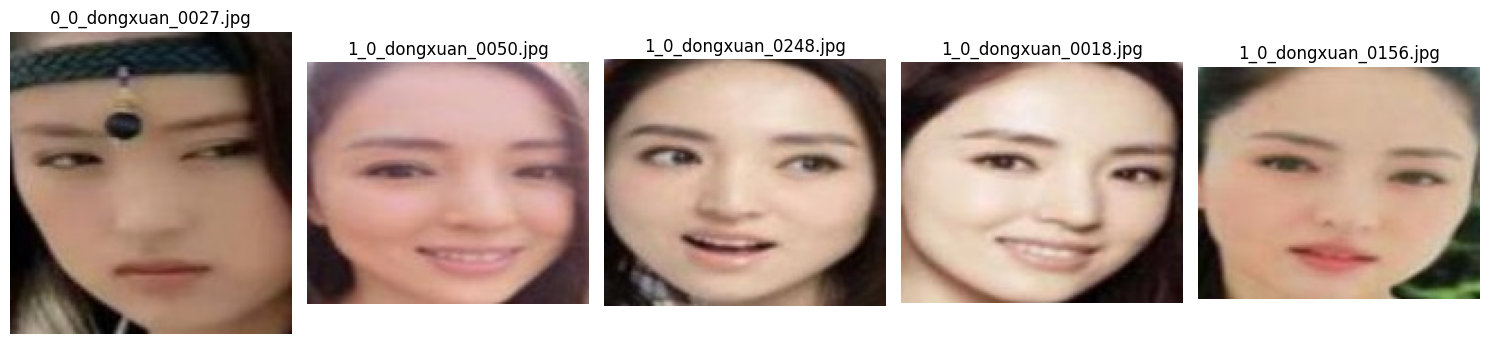

In [18]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the directory containing the images (from previous steps)
image_directory = individual_path # This is '/content/extracted_dataset/self-built-masked-face-recognition-dataset/AFDB_face_dataset/yangying'

# Get a list of all image files in the directory
image_files = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Limit to a few sample images (e.g., 5 images)
sample_images = image_files[:5]

print(f"Displaying {len(sample_images)} sample images from '{image_directory}':")

plt.figure(figsize=(15, 5))
for i, img_path in enumerate(sample_images):
    try:
        img = Image.open(img_path)
        plt.subplot(1, len(sample_images), i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(img_path))
        plt.axis('off')
    except Exception as e:
        print(f"Could not load image {os.path.basename(img_path)}: {e}")

plt.tight_layout()
plt.show()

## **MFRD csv**

In [19]:
import os
import csv

# ===========================
# CONFIGURE AFDB FOLDERS ONLY
# ===========================
AFDB_DATASETS = {
    "AFDB_face": "/content/extracted_dataset/self-built-masked-face-recognition-dataset/AFDB_face_dataset",
    "AFDB_masked": "/content/extracted_dataset/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset",
}

# ===========================
# OUTPUT FILES
# ===========================
MASTER_CSV = "afdb_master_dataset.csv"
MAP_CSV = "afdb_person_mapping.csv"

# ===========================
# INTERNAL MAPPINGS
# ===========================
person_to_id = {}
next_id = 1
master_rows = []

def register_person(name):
    """
    Assign a unique numeric ID to each person
    """
    global next_id
    if name not in person_to_id:
        person_to_id[name] = next_id
        next_id += 1
    return person_to_id[name]


def process_dataset(root_dir, masked_flag, source_name):
    """
    Walk through the AFDB folders:
    - image_path
    - person_id
    - person_name
    - masked (0/1)
    - source
    """
    for person_name in os.listdir(root_dir):
        person_dir = os.path.join(root_dir, person_name)
        if not os.path.isdir(person_dir):
            continue

        person_id = register_person(person_name)

        for img_file in os.listdir(person_dir):
            img_path = os.path.join(person_dir, img_file)

            if not img_file.lower().endswith((".jpg", ".jpeg", ".png")):
                continue

            master_rows.append([
                img_path,
                person_id,
                person_name,
                masked_flag,
                source_name
            ])


# ===========================
# PROCESS AFDB DATASETS ONLY
# ===========================
process_dataset(AFDB_DATASETS["AFDB_face"], masked_flag=0, source_name="AFDB_face")
process_dataset(AFDB_DATASETS["AFDB_masked"], masked_flag=1, source_name="AFDB_masked")

# ===========================
# WRITE MASTER CSV
# ===========================
with open(MASTER_CSV, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["image_path", "person_id", "person_name", "masked", "source"])
    writer.writerows(master_rows)

print(f"AFDB Master dataset saved to {MASTER_CSV}")

# ===========================
# WRITE PERSON MAPPING CSV
# ===========================
with open(MAP_CSV, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["person_id", "person_name"])
    for name, pid in person_to_id.items():
        writer.writerow([pid, name])

print(f"AFDB person mapping saved to {MAP_CSV}")


AFDB Master dataset saved to afdb_master_dataset.csv
AFDB person mapping saved to afdb_person_mapping.csv


# **the custom datasets**

## Process 'Dataset- With mask'

### Subtask:
Inspect the file type of '/content/Dataset- With mask-20251121T154101Z-1-001.zip' to understand how to process it.


In [2]:
!file /content/Dataset- With mask-20251121T154101Z-1-001.zip

/content/Dataset-:               cannot open `/content/Dataset-' (No such file or directory)
With:                            cannot open `With' (No such file or directory)
mask-20251121T154101Z-1-001.zip: cannot open `mask-20251121T154101Z-1-001.zip' (No such file or directory)


**Reasoning**:
The previous attempt to inspect the file type failed because the file path contained spaces and was not properly quoted. I need to re-run the `!file` command, enclosing the file path in double quotes to ensure it is treated as a single argument.



In [3]:
!file "/content/Dataset- With mask-20251121T154101Z-1-001.zip"

/content/Dataset- With mask-20251121T154101Z-1-001.zip: Zip archive data, at least v2.0 to extract, compression method=deflate


## Extract 'Dataset- With mask' archive

### Subtask:
Extract the contents of '/content/Dataset- With mask-20251121T154101Z-1-001.zip' to a new, dedicated directory.


**Reasoning**:
The previous step confirmed that '/content/Dataset- With mask-20251121T154101Z-1-001.zip' is a valid Zip archive. Now, I need to extract its contents to a new dedicated directory as instructed. This will involve using `zipfile` to extract and `os` to manage directories and list the contents.



In [4]:
import zipfile
import os

# Define the path to the downloaded zip file
zip_file_path = '/content/Dataset- With mask-20251121T154101Z-1-001.zip'

# Define the new directory where contents will be extracted
extract_dir = '/content/dataset_with_mask_extracted'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

print(f"Attempting to extract '{zip_file_path}' to '{extract_dir}'...")

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print("File extraction complete.")

    # List contents of the extracted directory to verify
    print(f"\nContents of '{extract_dir}':")
    for item in os.listdir(extract_dir):
        print(f"- {item}")
except zipfile.BadZipFile:
    print(f"Error: '{zip_file_path}' is not a valid Zip file. Skipping extraction.")
except Exception as e:
    print(f"An error occurred during extraction: {e}")

Attempting to extract '/content/Dataset- With mask-20251121T154101Z-1-001.zip' to '/content/dataset_with_mask_extracted'...
File extraction complete.

Contents of '/content/dataset_with_mask_extracted':
- Dataset- With mask


**Reasoning**:
The previous step successfully extracted the 'Dataset- With mask' archive into `/content/dataset_with_mask_extracted`, revealing a subdirectory named 'Dataset- With mask'. To locate the image files, I need to list the contents of this newly extracted subdirectory to understand its structure.



In [6]:
import os

# Define the path to the main extracted dataset directory
extracted_masked_root = '/content/dataset_with_mask_extracted/Dataset- With mask'

print(f"Listing contents of '{extracted_masked_root}':")
try:
    # List top-level items in the masked dataset directory
    contents_masked = os.listdir(extracted_masked_root)
    for item in contents_masked:
        print(f"- {item}")
except FileNotFoundError:
    print(f"Error: Directory '{extracted_masked_root}' not found.")
except Exception as e:
    print(f"An error occurred while listing directory contents: {e}")

Listing contents of '/content/dataset_with_mask_extracted/Dataset- With mask':
- Tsai Ing Wen
- Simon Cowell
- Mike Dewine
- Nicole Saba
- Floyd Mayweather
- Doug Ducey
- King Charles Philip
- King Abdullah II bin Al-Hussein
- Emma Watson
- Gwei Lun-mei
- Mohamed Sami
- Boris Johnson
- Yuriko Koike
- John Lee
- Timothee Chalamet
- Zachary Donohue
- Vivian Chen
- Melania Knauss
- Eman Ramadan
- Brody Jenner
- Sheikh Khaled bin Mohamed bin Zayed
- Priyanka Chopra
- Tessa Virtue
- Vanessa Hudgens
- Yuzuru Hanyu
- Matthew Morrison
- Veronika Zhilina
- Kendall Jenner
- Justin Trudeau
- Patrick Dempsey
- Angelina Golikova
- Kim Taeyeon
- elissa slotkin
- Janice Chen
- khloe kardashian
- test_masked
- Lebleba
- Zac Efron
- Zayn Malik
- Donnell Rawlings
- Angelina Jolie
- Aseel Omran
- Khatereh Ahmadi
- Eric Garcetti
- Edison Chen
- Uddhav Thackery
- Xi Jinping
- Renee Morrison
- Ron Desantis
- Jutta Leerdam
- Karina Safina
- Ariana Grande
- Thamina Usmani
- krystal jung
- Rihanna
- Cai Zhuoyi

**Reasoning**:
The previous step listed the contents of '/content/dataset_with_mask_extracted/Dataset- With mask', showing many subdirectories named after individuals, and also 'train' and 'test_masked'. To find actual image files, I need to list the contents of one of these subdirectories to understand its structure and confirm the presence of images. I will choose 'train' to inspect.



In [7]:
import os

# Define the path to one of the potential image directories (e.g., 'train')
image_dataset_path_masked = '/content/dataset_with_mask_extracted/Dataset- With mask/train'

print(f"Listing top-level contents of '{image_dataset_path_masked}':")
try:
    # List only a few top-level items to avoid overwhelming output if there are many subdirectories/files
    contents_train_masked = os.listdir(image_dataset_path_masked)
    for i, item in enumerate(contents_train_masked):
        print(f"- {item}")
        if i >= 9: # Limit to first 10 items for brevity
            print("... (and more)")
            break
except FileNotFoundError:
    print(f"Error: Directory '{image_dataset_path_masked}' not found.")
except Exception as e:
    print(f"An error occurred while listing directory contents: {e}")

Listing top-level contents of '/content/dataset_with_mask_extracted/Dataset- With mask/train':
- Yuzuru Hanyu
- Zac Efron
- Zayn Malik
- Zhou Dongyu
- Zuzana Caputova
- Yoshihide Suga


**Reasoning**:
The previous step showed that the 'train' directory contains subdirectories named after individuals. To find actual image files, I need to list the contents of one of these subdirectories to confirm the presence and format of images. I will choose the first individual's directory from the `contents_train_masked` list for inspection.



In [8]:
import os

# Define the path to one of the individual directories within the 'train' folder
individual_masked_path = os.path.join(image_dataset_path_masked, contents_train_masked[0]) # e.g., 'Yoshihide Suga'

print(f"Listing contents of an individual's masked directory: '{individual_masked_path}'")
try:
    # List a few items from inside an individual's directory
    individual_masked_contents = os.listdir(individual_masked_path)
    for i, item in enumerate(individual_masked_contents):
        print(f"- {item}")
        if i >= 9: # Limit to first 10 items for brevity
            print("... (and more)")
            break
    if not individual_masked_contents:
        print("No files found in this directory.")
except FileNotFoundError:
    print(f"Error: Directory '{individual_masked_path}' not found.")
except Exception as e:
    print(f"An error occurred while listing directory contents: {e}")

Listing contents of an individual's masked directory: '/content/dataset_with_mask_extracted/Dataset- With mask/train/Yuzuru Hanyu'
- 15.JPG
- 01.JPG
- 02.JPG
- 10.JPG
- 08.JPG
- 06.JPG
- 20.JPG
- 07.JPG
- 18.JPG
- 13.JPG
... (and more)


**Reasoning**:
The previous steps have confirmed the location and format of image files within the extracted 'Dataset- With mask' dataset. Now, to continue exploring the dataset, I will collect a few sample image paths from the individual's directory and display them using `matplotlib` and `PIL` (Pillow) to visually inspect the data.



Displaying 4 sample images from '/content/dataset_with_mask_extracted/Dataset- With mask/train/Yuzuru Hanyu':


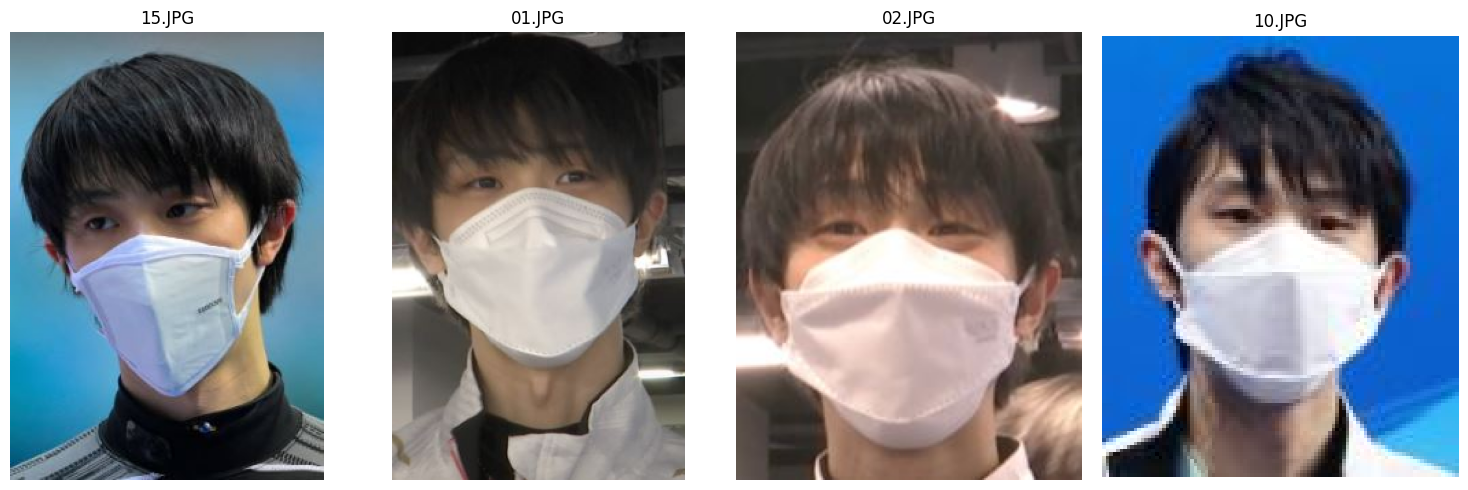

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the directory containing the images (from previous steps)
image_directory_masked = individual_masked_path # This is '/content/dataset_with_mask_extracted/Dataset- With mask/train/Yoshihide Suga'

# Get a list of all image files in the directory
image_files_masked = [os.path.join(image_directory_masked, f) for f in os.listdir(image_directory_masked) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Limit to a few sample images (e.g., 4 images, as there are only 4 in the example output)
sample_images_masked = image_files_masked[:4]

print(f"Displaying {len(sample_images_masked)} sample images from '{image_directory_masked}':")

plt.figure(figsize=(15, 5))
for i, img_path in enumerate(sample_images_masked):
    try:
        img = Image.open(img_path)
        plt.subplot(1, len(sample_images_masked), i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(img_path))
        plt.axis('off')
    except Exception as e:
        print(f"Could not load image {os.path.basename(img_path)}: {e}")

plt.tight_layout()
plt.show()

## Process 'Dataset- Without mask'

### Subtask:
Inspect the file type of '/content/Dataset- Without mask-20251121T154337Z-1-001.zip' to understand how to process it.

**Reasoning**:
Following the overall task, after processing the 'Dataset- With mask' archive, the next step is to inspect the file type of the second archive, '/content/Dataset- Without mask-20251121T154337Z-1-001.zip', using the `!file` shell command, similar to how the first archive was handled.



In [10]:
!file "/content/Dataset- Without mask-20251121T154337Z-1-001.zip"

/content/Dataset- Without mask-20251121T154337Z-1-001.zip: Zip archive data, at least v2.0 to extract, compression method=deflate


## Extract 'Dataset- Without mask' archive

### Subtask:
Extract the contents of '/content/Dataset- Without mask-20251121T154337Z-1-001.zip' to a new, dedicated directory.

**Reasoning**:
The previous step confirmed that '/content/Dataset- Without mask-20251121T154337Z-1-001.zip' is a valid Zip archive. Now, I need to extract its contents to a new dedicated directory as instructed. This will involve using `zipfile` to extract and `os` to manage directories and list the contents.



In [11]:
import zipfile
import os

# Define the path to the downloaded zip file
zip_file_path_nomask = '/content/Dataset- Without mask-20251121T154337Z-1-001.zip'

# Define the new directory where contents will be extracted
extract_dir_nomask = '/content/dataset_without_mask_extracted'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir_nomask, exist_ok=True)

print(f"Attempting to extract '{zip_file_path_nomask}' to '{extract_dir_nomask}'...")

try:
    with zipfile.ZipFile(zip_file_path_nomask, 'r') as zip_ref:
        zip_ref.extractall(extract_dir_nomask)
    print("File extraction complete.")

    # List contents of the extracted directory to verify
    print(f"\nContents of '{extract_dir_nomask}':")
    for item in os.listdir(extract_dir_nomask):
        print(f"- {item}")
except zipfile.BadZipFile:
    print(f"Error: '{zip_file_path_nomask}' is not a valid Zip file. Skipping extraction.")
except Exception as e:
    print(f"An error occurred during extraction: {e}")

Attempting to extract '/content/Dataset- Without mask-20251121T154337Z-1-001.zip' to '/content/dataset_without_mask_extracted'...
File extraction complete.

Contents of '/content/dataset_without_mask_extracted':
- Dataset- Without mask


**Reasoning**:
The previous step successfully extracted the 'Dataset- Without mask' archive into `/content/dataset_without_mask_extracted`, revealing a subdirectory named 'Dataset- Without mask'. To locate the image files, I need to list the contents of this newly extracted subdirectory to understand its structure.



In [12]:
import os

# Define the path to the main extracted dataset directory
extracted_nomask_root = '/content/dataset_without_mask_extracted/Dataset- Without mask'

print(f"Listing contents of '{extracted_nomask_root}':")
try:
    # List top-level items in the unmasked dataset directory
    contents_nomask = os.listdir(extracted_nomask_root)
    for item in contents_nomask:
        print(f"- {item}")
except FileNotFoundError:
    print(f"Error: Directory '{extracted_nomask_root}' not found.")
except Exception as e:
    print(f"An error occurred while listing directory contents: {e}")

Listing contents of '/content/dataset_without_mask_extracted/Dataset- Without mask':
- Tsai Ing Wen
- Simon Cowell
- Mike Dewine
- Nicole Saba
- Floyd Mayweather
- Doug Ducey
- King Charles Philip
- King Abdullah II bin Al-Hussein
- Emma Watson
- Gwei Lun-mei
- Mohamed Sami
- Boris Johnson
- Yuriko Koike
- John Lee
- Timothee Chalamet
- Zachary Donohue
- Vivian Chen
- Melania Knauss
- Eman Ramadan
- Brody Jenner
- Sheikh Khaled bin Mohamed bin Zayed
- Priyanka Chopra
- Tessa Virtue
- Vanessa Hudgens
- Yuzuru Hanyu
- Matthew Morrison
- Veronika Zhilina
- Kendall Jenner
- Justin Trudeau
- Patrick Dempsey
- Angelina Golikova
- Kim Taeyeon
- Janice Chen
- khloe kardashian
- Lebleba
- Zac Efron
- Zayn Malik
- Donnell Rawlings
- Angelina Jolie
- Aseel Omran
- Khatereh Ahmadi
- Eric Garcetti
- Edison Chen
- Uddhav Thackery
- Xi Jinping
- Renee Morrison
- Ron Desantis
- Jutta Leerdam
- Karina Safina
- Thamina Usmani
- krystal jung
- Rihanna
- Cai Zhuoyi
- Britney spears
- Michelle Obama
- Nawa

**Reasoning**:
The previous step listed the contents of '/content/dataset_without_mask_extracted/Dataset- Without mask', showing many subdirectories named after individuals. To find actual image files, I need to list the contents of one of these subdirectories to confirm the presence and format of images. I will choose the first individual's directory from the `contents_nomask` list for inspection.



In [13]:
import os

# Define the path to one of the individual directories within the 'Dataset- Without mask' folder
individual_nomask_path = os.path.join(extracted_nomask_root, contents_nomask[0]) # e.g., 'Gavin Newsom'

print(f"Listing contents of an individual's unmasked directory: '{individual_nomask_path}'")
try:
    # List a few items from inside an individual's directory
    individual_nomask_contents = os.listdir(individual_nomask_path)
    for i, item in enumerate(individual_nomask_contents):
        print(f"- {item}")
        if i >= 9: # Limit to first 10 items for brevity
            print("... (and more)")
            break
    if not individual_nomask_contents:
        print("No files found in this directory.")
except FileNotFoundError:
    print(f"Error: Directory '{individual_nomask_path}' not found.")
except Exception as e:
    print(f"An error occurred while listing directory contents: {e}")

Listing contents of an individual's unmasked directory: '/content/dataset_without_mask_extracted/Dataset- Without mask/Tsai Ing Wen'
- 33.JPG
- 35.JPG
- 48.JPG
- 15.JPG
- 37.JPG
- 44.JPG
- 02.JPG
- 10.JPG
- 27.JPG
- 42.JPG
... (and more)


**Reasoning**:
The previous steps have confirmed the location and format of image files within the extracted 'Dataset- Without mask' dataset. Now, to continue exploring the dataset, I will collect a few sample image paths from the individual's directory and display them using `matplotlib` and `PIL` (Pillow) to visually inspect the data.



Displaying 5 sample images from '/content/dataset_without_mask_extracted/Dataset- Without mask/Tsai Ing Wen':


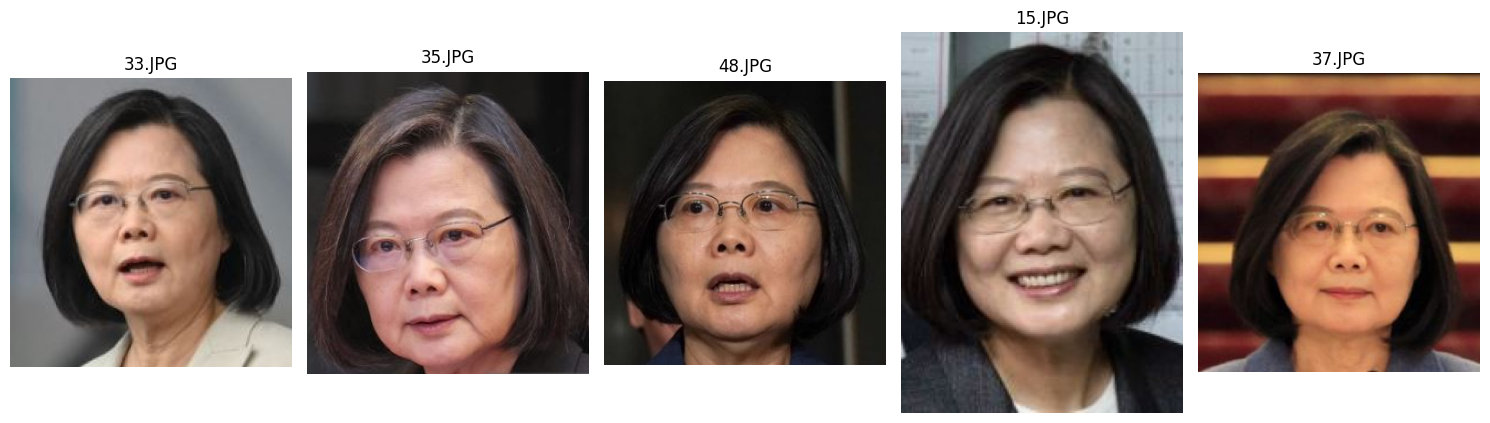

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the directory containing the images (from previous steps)
image_directory_nomask = individual_nomask_path # This is '/content/dataset_without_mask_extracted/Dataset- Without mask/Gavin Newsom'

# Get a list of all image files in the directory
image_files_nomask = [os.path.join(image_directory_nomask, f) for f in os.listdir(image_directory_nomask) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Limit to a few sample images (e.g., 5 images)
sample_images_nomask = image_files_nomask[:5]

print(f"Displaying {len(sample_images_nomask)} sample images from '{image_directory_nomask}':")

plt.figure(figsize=(15, 5))
for i, img_path in enumerate(sample_images_nomask):
    try:
        img = Image.open(img_path)
        plt.subplot(1, len(sample_images_nomask), i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(img_path))
        plt.axis('off')
    except Exception as e:
        print(f"Could not load image {os.path.basename(img_path)}: {e}")

plt.tight_layout()
plt.show()

## Summary for 'Dataset- With mask' and 'Dataset- Without mask':

### Data Analysis Key Findings
*   Both '/content/Dataset- With mask-20251121T154101Z-1-001.zip' and '/content/Dataset- Without mask-20251121T154337Z-1-001.zip' were identified as Zip archives.
*   They were successfully extracted to their respective dedicated directories: `/content/dataset_with_mask_extracted` and `/content/dataset_without_mask_extracted`.
*   Within each extracted directory, a primary folder (`Dataset- With mask` and `Dataset- Without mask`) was found, containing numerous subdirectories named after individuals.
*   The 'Dataset- With mask' directory also contained 'train' and 'test_masked' subdirectories, with images organized by individual within the 'train' folder.
*   Image files, primarily in `.JPG` format, were found within these individual-named subdirectories for both datasets.
*   Sample images from both datasets were successfully loaded and displayed, confirming the accessibility and visual content of the data. Some `.JPG` files were identified as potentially corrupted or not standard image format by PIL, leading to errors during display.

### Insights or Next Steps
*   The datasets provide a collection of face images, categorized into 'with mask' and 'without mask', suitable for training and evaluating face detection and recognition models, especially for mask-wearing scenarios.
*   The directory structure (individual names as subdirectories) is ideal for tasks like face recognition where unique identities need to be preserved.
*   Preprocessing steps such as ensuring all image files are valid and handling potential corruptions (as seen with some `.JPG` files) will be necessary.
*   Further steps would involve integrating these datasets into a face detection and alignment pipeline, such as RetinaFace, as outlined in the earlier text cells, for feature extraction and model training.

## custom dataset csv

In [15]:
import os
import csv

# ===========================
# CONFIGURE YOUR FOLDERS HERE
# ===========================
DATASETS = {
    "unmasked": "/content/dataset_without_mask_extracted/Dataset- Without mask",
    "masked": "/content/dataset_with_mask_extracted/Dataset- With mask",
}

# ===========================
# OUTPUT FILES
# ===========================
MASTER_CSV = "master_custom_dataset.csv"
MAP_CSV = "person_mapping_custom.csv"

# ===========================
# INTERNAL MAPPINGS
# ===========================
person_to_id = {}
next_id = 1
master_rows = []

def register_person(name):
    """
    Assign a unique numeric ID to each person.
    """
    global next_id
    if name not in person_to_id:
        person_to_id[name] = next_id
        next_id += 1
    return person_to_id[name]

def process_dataset(root_dir, masked_flag, source_name):
    """
    Walk through custom dataset folders:
    - image_path
    - person_id
    - person_name
    - masked (0/1)
    - source
    """
    for person_name in os.listdir(root_dir):
        person_dir = os.path.join(root_dir, person_name)
        if not os.path.isdir(person_dir):
            continue

        person_id = register_person(person_name)

        for img_file in os.listdir(person_dir):
            img_path = os.path.join(person_dir, img_file)

            if not img_file.lower().endswith((".jpg", ".jpeg", ".png")):
                continue

            master_rows.append([
                img_path,
                person_id,
                person_name,
                masked_flag,
                source_name
            ])

# ===========================
# PROCESS CUSTOM DATASETS ONLY
# ===========================
process_dataset(DATASETS["unmasked"], masked_flag=0, source_name="custom_unmasked")
process_dataset(DATASETS["masked"], masked_flag=1, source_name="custom_masked")

# ===========================
# WRITE MASTER CSV
# ===========================
with open(MASTER_CSV, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["image_path", "person_id", "person_name", "masked", "source"])
    writer.writerows(master_rows)

print(f"Master CSV saved to {MASTER_CSV}")

# ===========================
# WRITE PERSON MAPPING CSV
# ===========================
with open(MAP_CSV, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["person_id", "person_name"])
    for name, pid in person_to_id.items():
        writer.writerow([pid, name])

print(f"Person mapping saved to {MAP_CSV}")


Master CSV saved to master_custom_dataset.csv
Person mapping saved to person_mapping_custom.csv


In [ ]:
pd.read_csv("/content/master_custom_dataset.csv")

,image_path,person_id,person_name,masked,source
0,/content/dataset_without_mask_extracted/Datase...,1,Nick Jonas,0,custom_unmasked
1,/content/dataset_without_mask_extracted/Datase...,1,Nick Jonas,0,custom_unmasked
2,/content/dataset_without_mask_extracted/Datase...,1,Nick Jonas,0,custom_unmasked
3,/content/dataset_without_mask_extracted/Datase...,1,Nick Jonas,0,custom_unmasked
4,/content/dataset_without_mask_extracted/Datase...,1,Nick Jonas,0,custom_unmasked
...,...,...,...,...,...
11233,/content/dataset_with_mask_extracted/Dataset- ...,233,Pharrell Williams,1,custom_masked
11234,/content/dataset_with_mask_extracted/Dataset- ...,233,Pharrell Williams,1,custom_masked
11235,/content/dataset_with_mask_extracted/Dataset- ...,233,Pharrell Williams,1,custom_masked
11236,/content/dataset_with_mask_extracted/Dataset- ...,233,Pharrell Williams,1,custom_masked


# **Combined master csv**

In [46]:
import os
import csv
from pathlib import Path

# ===========================
# CONFIGURE YOUR FOLDERS HERE
# ===========================
DATASETS = {
    "AFDB_face": "/content/extracted_dataset/self-built-masked-face-recognition-dataset/AFDB_face_dataset",
    "AFDB_masked": "/content/extracted_dataset/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset",

    "custom_unmasked": "/content/dataset_without_mask_extracted/Dataset- Without mask",
    "custom_masked": "/content/dataset_with_mask_extracted/Dataset- With mask",
}

# ===========================
# OUTPUT FILES
# ===========================
MASTER_CSV = "master_dataset.csv"
MAP_CSV = "person_mapping.csv"

# ===========================
# INTERNAL MAPPINGS
# ===========================
person_to_id = {}
next_id = 1

master_rows = []

def register_person(name):
    """
    Assign a unique numeric ID to each person
    """
    global next_id
    if name not in person_to_id:
        person_to_id[name] = next_id
        next_id += 1
    return person_to_id[name]


def process_dataset(root_dir, masked_flag, source_name):
    """
    Walk through a dataset folder and extract:
    - image_path
    - person_id
    - person_name
    - masked (0/1)
    - source
    """
    for person_name in os.listdir(root_dir):
        person_dir = os.path.join(root_dir, person_name)
        if not os.path.isdir(person_dir):
            continue

        person_id = register_person(person_name)

        for img_file in os.listdir(person_dir):
            img_path = os.path.join(person_dir, img_file)

            if not img_file.lower().endswith((".jpg", ".jpeg", ".png")):
                continue

            master_rows.append([
                img_path,
                person_id,
                person_name,
                masked_flag,
                source_name
            ])


# ===========================
# PROCESS ALL DATASETS
# ===========================
process_dataset(DATASETS["AFDB_face"], masked_flag=0, source_name="AFDB_face")
process_dataset(DATASETS["AFDB_masked"], masked_flag=1, source_name="AFDB_masked")

process_dataset(DATASETS["custom_unmasked"], masked_flag=0, source_name="custom_unmasked")
process_dataset(DATASETS["custom_masked"], masked_flag=1, source_name="custom_masked")

# ===========================
# WRITE MASTER CSV
# ===========================
with open(MASTER_CSV, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["image_path", "person_id", "person_name", "masked", "source"])
    writer.writerows(master_rows)

print(f"Master dataset saved to {MASTER_CSV}")

# ===========================
# WRITE PERSON MAPPING CSV
# ===========================
with open(MAP_CSV, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["person_id", "person_name"])
    for name, pid in person_to_id.items():
        writer.writerow([pid, name])

print(f"Person mapping saved to {MAP_CSV}")


Master dataset saved to master_dataset.csv
Person mapping saved to person_mapping.csv


In [47]:
master_df = pd.read_csv("/content/master_dataset.csv")
master_mapping = pd.read_csv("/content/person_mapping.csv")

In [48]:
master_df.head()

,image_path,person_id,person_name,masked,source
0,/content/extracted_dataset/self-built-masked-f...,1,dongxuan,0,AFDB_face
1,/content/extracted_dataset/self-built-masked-f...,1,dongxuan,0,AFDB_face
2,/content/extracted_dataset/self-built-masked-f...,1,dongxuan,0,AFDB_face
3,/content/extracted_dataset/self-built-masked-f...,1,dongxuan,0,AFDB_face
4,/content/extracted_dataset/self-built-masked-f...,1,dongxuan,0,AFDB_face


In [49]:
master_mapping.head()

,person_id,person_name
0,1,dongxuan
1,2,luozhixiang
2,3,zhangxueying
3,4,huxia
4,5,wujing


# **detect_and_align_Faces**

Face Detection & Alignment


* Crop face

* Align using 5 facial landmarks

* Resize to 112×112

* Normalize



In [16]:
!pip install  -q mediapipe==0.10.14 opencv-python numpy tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is incompatible.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 4.25.8 which is incompatible.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.


In [19]:
!wget -O face_landmarker.task \
"https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task"


--2025-11-22 13:03:35--  https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 172.253.118.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3758596 (3.6M) [application/octet-stream]
Saving to: ‘face_landmarker.task’

face_landmarker.tas 100%[===================>]   3.58M  2.82MB/s    in 1.3s    

2025-11-22 13:03:36 (2.82 MB/s) - ‘face_landmarker.task’ saved [3758596/3758596]



In [20]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import numpy as np

BaseOptions = python.BaseOptions
FaceLandmarker = vision.FaceLandmarker
FaceLandmarkerOptions = vision.FaceLandmarkerOptions
RunningMode = vision.RunningMode

options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path="face_landmarker.task"),
    running_mode=RunningMode.IMAGE,
    num_faces=1
)

landmarker = FaceLandmarker.create_from_options(options)



In [21]:
def align_face_mediapipe(img_bgr):
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    mp_img = mp.Image(image_format=mp.ImageFormat.SRGB, data=img)

    result = landmarker.detect(mp_img)
    if not result.face_landmarks:
        return None  # no face detected

    ln = result.face_landmarks[0]
    h, w, _ = img_bgr.shape

    pts = np.array([[lm.x * w, lm.y * h] for lm in ln], dtype=np.float32)

    # Eye indices (MediaPipe Mesh)
    left_eye  = pts[468]
    right_eye = pts[473]

    # Compute alignment
    dx = right_eye[0] - left_eye[0]
    dy = right_eye[1] - left_eye[1]
    angle = np.degrees(np.arctan2(dy, dx))
    center = ((left_eye[0] + right_eye[0]) / 2,
              (left_eye[1] + right_eye[1]) / 2)

    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img_bgr, M, (w, h))

    # Crop around center (224x224 then resize)
    x, y = int(center[0]), int(center[1])
    crop_size = 200

    x1, y1 = max(0, x - crop_size//2), max(0, y - crop_size//2)
    x2, y2 = min(w, x + crop_size//2), min(h, y + crop_size//2)
    cropped = rotated[y1:y2, x1:x2]

    if cropped.size == 0:
        return None

    aligned = cv2.resize(cropped, (112, 112))
    return aligned


Aligned shape: (112, 112, 3)


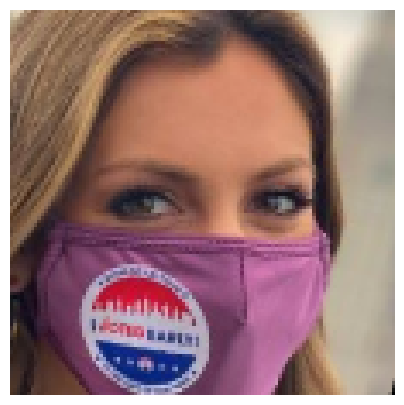

In [ ]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("/content/04.JPG")
aligned = align_face_mediapipe(img)

if aligned is None:
    print("❌ No face detected")
else:
    print("Aligned shape:", aligned.shape)
    cv2.imwrite("aligned_example.jpg", aligned)

    # Show the result
    plt.figure(figsize=(5,5))
    plt.imshow(cv2.cvtColor(aligned, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


In [22]:
import pandas as pd

df = pd.read_csv("/content/master_custom_dataset.csv")
df.head()


,image_path,person_id,person_name,masked,source
0,/content/dataset_without_mask_extracted/Datase...,1,Tsai Ing Wen,0,custom_unmasked
1,/content/dataset_without_mask_extracted/Datase...,1,Tsai Ing Wen,0,custom_unmasked
2,/content/dataset_without_mask_extracted/Datase...,1,Tsai Ing Wen,0,custom_unmasked
3,/content/dataset_without_mask_extracted/Datase...,1,Tsai Ing Wen,0,custom_unmasked
4,/content/dataset_without_mask_extracted/Datase...,1,Tsai Ing Wen,0,custom_unmasked


In [23]:
import os
from tqdm import tqdm

OUTPUT_DIR = "/content/aligned_dataset"
os.makedirs(OUTPUT_DIR, exist_ok=True)


In [24]:
import cv2

for idx, row in tqdm(df.iterrows(), total=len(df), desc="Aligning Dataset"):
    img_path = row["image_path"]
    person_name = row["person_name"]  # safer than using folder name

    # output folder: /aligned_dataset/person_name/
    out_dir = os.path.join(OUTPUT_DIR, person_name)
    os.makedirs(out_dir, exist_ok=True)

    # read image
    img = cv2.imread(img_path)
    if img is None:
        print("❌ Failed to read:", img_path)
        continue

    aligned = align_face_mediapipe(img)
    if aligned is None:
        print("❌ No face:", img_path)
        continue

    # output file — keep original filename
    file_name = os.path.basename(img_path)
    out_path = os.path.join(out_dir, file_name)
    cv2.imwrite(out_path, aligned)


Aligning Dataset:   0%|          | 0/11238 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Aligning Dataset:  77%|███████▋  | 8605/11238 [02:48<01:08, 38.45it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Mike Dewine/03.png


Aligning Dataset:  77%|███████▋  | 8634/11238 [02:49<01:08, 38.14it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/King Abdullah II bin Al-Hussein/01.jpg
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/King Abdullah II bin Al-Hussein/13.jpg
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/King Abdullah II bin Al-Hussein/07.JPG
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/King Abdullah II bin Al-Hussein/14.jpg


Aligning Dataset:  77%|███████▋  | 8676/11238 [02:50<00:51, 49.60it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Boris Johnson/01.JPG
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Boris Johnson/19.JPG


Aligning Dataset:  77%|███████▋  | 8694/11238 [02:50<00:48, 52.58it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Boris Johnson/21.JPG


Aligning Dataset:  79%|███████▉  | 8865/11238 [02:53<00:39, 60.00it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Kendall Jenner/04.jpg
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Kendall Jenner/02.jpg
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Kendall Jenner/07.jpg


Aligning Dataset:  80%|███████▉  | 8970/11238 [02:55<00:39, 58.06it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Zayn Malik/05.JPG


Aligning Dataset:  81%|████████▏ | 9141/11238 [02:58<00:37, 56.54it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Britney spears/01.JPG


Aligning Dataset:  82%|████████▏ | 9271/11238 [03:01<00:53, 37.09it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Bella Hadid/03.jpg


Aligning Dataset:  83%|████████▎ | 9336/11238 [03:02<00:34, 55.72it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Steny Hoyer/27.JPG
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Steny Hoyer/08.JPG


Aligning Dataset:  83%|████████▎ | 9361/11238 [03:03<00:32, 57.83it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Steny Hoyer/25.JPG
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Steny Hoyer/49.JPG
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Steny Hoyer/26.JPG


Aligning Dataset:  83%|████████▎ | 9373/11238 [03:03<00:32, 56.53it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Steny Hoyer/22.JPG
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Steny Hoyer/50.JPG


Aligning Dataset:  84%|████████▎ | 9409/11238 [03:03<00:33, 54.79it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Mitch McConnell/12.JPG


Aligning Dataset:  84%|████████▍ | 9446/11238 [03:04<00:31, 57.75it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Sophie Turner/06.jpg
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Sophie Turner/17.jpg


Aligning Dataset:  85%|████████▍ | 9507/11238 [03:05<00:30, 56.02it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Joseph Jonas/23.jpg


Aligning Dataset:  85%|████████▍ | 9543/11238 [03:06<00:30, 55.51it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Queen Camilla/04.jpg


Aligning Dataset:  85%|████████▌ | 9555/11238 [03:06<00:30, 54.46it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Kerry Washington/03.JPG


Aligning Dataset:  86%|████████▌ | 9627/11238 [03:07<00:28, 55.73it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Natalie D_Alessandro/07.JPG
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Adeliia Petrosian/03.JPG


Aligning Dataset:  86%|████████▌ | 9646/11238 [03:08<00:27, 57.75it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Madison Hubbell/06.JPG


Aligning Dataset:  86%|████████▌ | 9677/11238 [03:08<00:27, 57.35it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Xu Dongdong/02.jpg
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Xu Dongdong/05.JPG


Aligning Dataset:  86%|████████▋ | 9709/11238 [03:09<00:26, 58.70it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Maia Shibutani/26.JPG


Aligning Dataset:  89%|████████▊ | 9950/11238 [03:14<00:34, 37.10it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Cristiano Ronaldo/08.jpg


Aligning Dataset:  89%|████████▉ | 9978/11238 [03:14<00:24, 51.60it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Charlie Baker/22.JPG


Aligning Dataset:  89%|████████▉ | 9990/11238 [03:15<00:23, 54.12it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Lionel Messi/11.JPG


Aligning Dataset:  90%|████████▉ | 10075/11238 [03:16<00:19, 58.28it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Biden/09.jpg


Aligning Dataset:  90%|█████████ | 10148/11238 [03:18<00:19, 55.20it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Lojain Omran/04.JPG


Aligning Dataset:  91%|█████████ | 10178/11238 [03:18<00:19, 54.84it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Hailey Bieber/14.jpg


Aligning Dataset:  91%|█████████ | 10196/11238 [03:18<00:18, 57.07it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Debbie Dingell/19.JPG
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Debbie Dingell/12.JPG


Aligning Dataset:  91%|█████████ | 10227/11238 [03:19<00:22, 45.46it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Prince William/02.jpg
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Prince William/07.jpg


Aligning Dataset:  92%|█████████▏| 10305/11238 [03:21<00:16, 57.58it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Sheikh Mohamed bin Zayed Al Nahyan/04.jpg


Aligning Dataset:  92%|█████████▏| 10324/11238 [03:21<00:15, 57.25it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Larry Hogan/11.JPG


Aligning Dataset:  93%|█████████▎| 10405/11238 [03:22<00:13, 60.18it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Prince Harry/02.jpg
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Prince Harry/06.jpg
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Prince Harry/04.JPG


Aligning Dataset:  93%|█████████▎| 10443/11238 [03:23<00:13, 58.64it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Antoinette de Jong/20.JPG


Aligning Dataset:  94%|█████████▍| 10539/11238 [03:25<00:16, 42.54it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Prince Mohamed bin Salman/04.jpg
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Prince Mohamed bin Salman/07.jpg


Aligning Dataset:  94%|█████████▍| 10587/11238 [03:26<00:17, 37.52it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Nancy Pelosi/12.JPG


Aligning Dataset:  94%|█████████▍| 10599/11238 [03:26<00:17, 36.57it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Phil Murphy/03.png


Aligning Dataset:  95%|█████████▍| 10648/11238 [03:27<00:11, 52.75it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Jared Polis/09.JPG


Aligning Dataset:  96%|█████████▌| 10756/11238 [03:29<00:08, 54.68it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Deepika Padukone/04.JPG


Aligning Dataset:  96%|█████████▋| 10840/11238 [03:31<00:07, 56.54it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Queen Rania Al Abdullah/09.jpg


Aligning Dataset:  97%|█████████▋| 10858/11238 [03:31<00:07, 53.55it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Debbie Stabenow/02.JPG


Aligning Dataset:  97%|█████████▋| 10918/11238 [03:32<00:05, 54.09it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Shoma Uno/22.JPG


Aligning Dataset: 100%|█████████▉| 11183/11238 [03:37<00:01, 39.20it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Chen Zheyuan/30.JPG


Aligning Dataset: 100%|█████████▉| 11192/11238 [03:38<00:01, 40.51it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Chen Zheyuan/38.JPG


Aligning Dataset: 100%|█████████▉| 11225/11238 [03:39<00:00, 36.32it/s]

❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Donald Trump/02.jpg
❌ No face: /content/dataset_with_mask_extracted/Dataset- With mask/Donald Trump/07.jpg


Aligning Dataset: 100%|██████████| 11238/11238 [03:39<00:00, 51.20it/s]


# data loader


In [25]:
!pip install -q facenet-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 129.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.

In [26]:
!pip install --upgrade --force-reinstall torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 989.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 98.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196

In [1]:
import os
from PIL import Image
from torch.utils.data import Dataset
import torchvision.transforms as T

class FaceNetDataset(Dataset):
    def __init__(self, root):
        self.root = root
        self.samples = []
        self.person_to_id = {}
        pid = 0

        for person_name in os.listdir(root):
            person_path = os.path.join(root, person_name)
            if not os.path.isdir(person_path):
                continue

            self.person_to_id[person_name] = pid
            pid += 1

            for img_file in os.listdir(person_path):
                if img_file.lower().endswith(("jpg", "jpeg", "png")):
                    self.samples.append((os.path.join(person_path, img_file), self.person_to_id[person_name]))

        # Facenet-pytorch expects 160x160!
        self.transform = T.Compose([
            T.Resize((160, 160)),  # <-- This solves your problem
            T.ToTensor(),
            T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ])

    def __getitem__(self, idx):
        path, pid = self.samples[idx]
        img = Image.open(path).convert("RGB")
        img = self.transform(img)
        return img, pid

    def __len__(self):
        return len(self.samples)


In [2]:
from facenet_pytorch import InceptionResnetV1

from facenet_pytorch import InceptionResnetV1
import torch
import torch.nn as nn

# Load FaceNet
model = InceptionResnetV1(pretrained='vggface2', classify=False)
model = model.cuda()

# FIX for BatchNorm training with batch size 1
model.eval()      # <-- ADD THIS

# Define loss
triplet_loss = torch.nn.TripletMarginLoss(margin=1.0, p=2)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


  0%|          | 0.00/107M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/facenet_pytorch/models/inception_resnet_v1.py:329: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(cached_file)

In [3]:
import random

def sample_triplet(dataset):
    # choose anchor
    anchor_idx = random.randint(0, len(dataset)-1)
    anchor_img, anchor_id = dataset[anchor_idx]

    # choose positive (same person)
    while True:
        pos_idx = random.randint(0, len(dataset)-1)
        pos_img, pos_id = dataset[pos_idx]
        if pos_id == anchor_id:
            break

    # choose negative (different person)
    while True:
        neg_idx = random.randint(0, len(dataset)-1)
        neg_img, neg_id = dataset[neg_idx]
        if neg_id != anchor_id:
            break

    return anchor_img, pos_img, neg_img



In [4]:
def train_triplet(model, dataset, epochs=10, steps_per_epoch=2000):
    model.eval()  # <-- KEEP model in eval mode

    for epoch in range(epochs):
        total_loss = 0

        for step in range(steps_per_epoch):
            a, p, n = sample_triplet(dataset)
            a, p, n = a.cuda().unsqueeze(0), p.cuda().unsqueeze(0), n.cuda().unsqueeze(0)

            emb_a = model(a)
            emb_p = model(p)
            emb_n = model(n)

            loss = triplet_loss(emb_a, emb_p, emb_n)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs} — Loss: {total_loss/steps_per_epoch:.4f}")


In [6]:
def set_bn_eval(m):
    if isinstance(m, torch.nn.BatchNorm2d) or isinstance(m, torch.nn.BatchNorm1d):
        m.eval()

model = InceptionResnetV1(pretrained='vggface2', classify=False).cuda()
model.train()
model.apply(set_bn_eval)  # freeze BN


InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

In [7]:
from torch.utils.data import Dataset, DataLoader
import torch
import random

class TripletDataset(Dataset):
    def __init__(self, dataset, batch_size=32):
        self.dataset = dataset
        self.batch_size = batch_size

        # build index per person
        self.person_index = {}
        for idx, (_, pid) in enumerate(dataset.samples):
            self.person_index.setdefault(pid, []).append(idx)

        # list of all IDs
        self.ids = list(self.person_index.keys())

    def __len__(self):
        return 100000  # infinite sampling

    def __getitem__(self, idx):
        a_id = random.choice(self.ids)
        pos_id = a_id
        neg_id = random.choice([i for i in self.ids if i != a_id])

        a_idx, p_idx = random.sample(self.person_index[a_id], 2)
        n_idx = random.choice(self.person_index[neg_id])

        a_img, _ = self.dataset[a_idx]
        p_img, _ = self.dataset[p_idx]
        n_img, _ = self.dataset[n_idx]

        return a_img, p_img, n_img

triplet_loader = DataLoader(TripletDataset(dataset), batch_size=32, shuffle=True)

In [8]:
from tqdm import tqdm

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
triplet_loss = nn.TripletMarginLoss(margin=1, p=2)

def train(model, loader, epochs=10):
    model.train()
    model.apply(set_bn_eval)  # keep BN frozen

    for epoch in range(epochs):
        pbar = tqdm(loader, total=300)  # 300 batches per epoch
        total_loss = 0

        for a, p, n in pbar:
            a, p, n = a.cuda(), p.cuda(), n.cuda()

            emb_a = model(a)
            emb_p = model(p)
            emb_n = model(n)

            loss = triplet_loss(emb_a, emb_p, emb_n)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            pbar.set_description(f"Epoch {epoch+1}, Loss={loss.item():.4f}")

        print(f"Epoch {epoch+1}: Mean Loss = {total_loss/300:.4f}")


In [9]:
dataset = FaceNetDataset("/content/aligned_dataset")
train(model, triplet_loader, epochs=10)

Epoch 1, Loss=0.0795: : 3125it [26:24,  1.97it/s]


Epoch 1: Mean Loss = 1.4569


Epoch 2, Loss=0.1028: : 3125it [26:18,  1.98it/s]


Epoch 2: Mean Loss = 0.7382


Epoch 3, Loss=0.0620: : 559it [04:40,  1.99it/s]


KeyboardInterrupt: 

In [11]:
torch.save(model.state_dict(), "current_facenet_backup.pth")
print("✔ Model saved!")


✔ Model saved!


In [20]:
from facenet_pytorch import InceptionResnetV1
import torch

model = InceptionResnetV1(pretrained='vggface2', classify=False)
model.load_state_dict(torch.load("current_facenet_backup.pth"))
model = model.cuda()
model.eval()


/tmp/ipython-input-1690759206.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("current_facenet_backup.pth"))


InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

In [24]:
import pandas as pd

In [26]:
df = pd.read_csv("/content/afdb_master_dataset.csv")

In [27]:
df

,image_path,person_id,person_name,masked,source
0,/content/extracted_dataset/self-built-masked-f...,1,dongxuan,0,AFDB_face
1,/content/extracted_dataset/self-built-masked-f...,1,dongxuan,0,AFDB_face
2,/content/extracted_dataset/self-built-masked-f...,1,dongxuan,0,AFDB_face
3,/content/extracted_dataset/self-built-masked-f...,1,dongxuan,0,AFDB_face
4,/content/extracted_dataset/self-built-masked-f...,1,dongxuan,0,AFDB_face
...,...,...,...,...,...
92666,/content/extracted_dataset/self-built-masked-f...,458,huojianhua,1,AFDB_masked
92667,/content/extracted_dataset/self-built-masked-f...,458,huojianhua,1,AFDB_masked
92668,/content/extracted_dataset/self-built-masked-f...,458,huojianhua,1,AFDB_masked
92669,/content/extracted_dataset/self-built-masked-f...,458,huojianhua,1,AFDB_masked


In [28]:
df_rmfd = df[df['source'].isin(['AFDB_face', 'AFDB_masked'])]
print(len(df_rmfd))



92671


In [29]:
import pandas as pd

def sample_person_group(df, percent=0.05):
    samples = []
    for pid, group in df.groupby(["person_id", "masked"]):
        k = max(1, int(len(group) * percent))
        samples.append(group.sample(k, random_state=42))
    return pd.concat(samples)

df_test = sample_person_group(df_rmfd, percent=0.05)
print(len(df_test))


4803


In [32]:


import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import numpy as np

# Load MediaPipe Landmarker
BaseOptions = python.BaseOptions
FaceLandmarker = vision.FaceLandmarker
FaceLandmarkerOptions = vision.FaceLandmarkerOptions
RunningMode = vision.RunningMode

options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path="face_landmarker.task"),
    running_mode=RunningMode.IMAGE,
    num_faces=1
)

landmarker = FaceLandmarker.create_from_options(options)

def align_face_mediapipe(img_bgr):
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    mp_img = mp.Image(image_format=mp.ImageFormat.SRGB, data=img)

    result = landmarker.detect(mp_img)
    if not result.face_landmarks:
        return None  # no face detected

    ln = result.face_landmarks[0]
    h, w, _ = img_bgr.shape

    pts = np.array([[lm.x * w, lm.y * h] for lm in ln], dtype=np.float32)

    # Eye landmarks (MediaPipe face mesh)
    left_eye  = pts[468]
    right_eye = pts[473]

    dx = right_eye[0] - left_eye[0]
    dy = right_eye[1] - left_eye[1]
    angle = np.degrees(np.arctan2(dy, dx))
    center = ((left_eye[0] + right_eye[0]) / 2,
              (left_eye[1] + right_eye[1]) / 2)

    # Rotate image
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img_bgr, M, (w, h))

    # Crop around eyes
    crop_size = 200
    x, y = int(center[0]), int(center[1])

    x1, y1 = max(0, x - crop_size // 2), max(0, y - crop_size // 2)
    x2, y2 = min(w, x + crop_size // 2), min(h, y + crop_size // 2)

    cropped = rotated[y1:y2, x1:x2]

    if cropped.size == 0:
        return None

    # FaceNet required size
    aligned = cv2.resize(cropped, (160, 160))
    return aligned


In [34]:
df_test = sample_person_group(df_rmfd, percent=0.05)

In [35]:
import os
import cv2
from tqdm import tqdm

TEST_ALIGN_DIR = "/content/rmfd_test_aligned"
os.makedirs(TEST_ALIGN_DIR, exist_ok=True)

aligned_paths = []

for idx, row in tqdm(df_test.iterrows(), total=len(df_test)):
    img = cv2.imread(row["image_path"])
    if img is None:
        continue

    aligned = align_face_mediapipe(img)
    if aligned is None:
        continue

    # save path mimics folder structure
    save_path = row["image_path"].replace("/content/extracted_dataset", TEST_ALIGN_DIR)
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    cv2.imwrite(save_path, aligned)

    aligned_paths.append((save_path, row["person_id"], row["masked"]))


  0%|          | 0/4803 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
100%|██████████| 4803/4803 [01:33<00:00, 51.17it/s]


In [36]:
aligned_paths.append((save_path, row["person_id"], row["masked"]))

In [37]:
import pandas as pd

df_aligned = pd.DataFrame(aligned_paths, columns=["aligned_path", "person_id", "masked"])
df_aligned.head()


,aligned_path,person_id,masked
0,/content/rmfd_test_aligned/self-built-masked-f...,1,0
1,/content/rmfd_test_aligned/self-built-masked-f...,1,0
2,/content/rmfd_test_aligned/self-built-masked-f...,1,0
3,/content/rmfd_test_aligned/self-built-masked-f...,1,0
4,/content/rmfd_test_aligned/self-built-masked-f...,1,0


In [39]:
from facenet_pytorch import InceptionResnetV1
import torch
import torchvision.transforms as T
from PIL import Image
import torch.nn.functional as F

# Initialize the same model architecture used in training
model = InceptionResnetV1(pretrained=None, classify=False)

# Load checkpoint weights (ignore classifier layer)
state = torch.load("current_facenet_backup.pth", weights_only=True)
model.load_state_dict(state, strict=False)

model = model.cuda()
model.eval()


InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

In [40]:
import torch
from PIL import Image
import torchvision.transforms as T

transform = T.Compose([
    T.Resize((160, 160)),
    T.ToTensor(),
    T.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5]),
])

def get_embedding(path):
    img = Image.open(path).convert("RGB")
    img = transform(img).unsqueeze(0).cuda()

    with torch.no_grad():
        emb = model(img)
    return emb.cpu()


In [42]:
!find /content/rmfd_test_aligned -maxdepth 3 -type f | head -20

In [53]:
import torch.nn.functional as F

emb1 = get_embedding("/content/aligned_dataset/Abdelfattah Elsisi/01.JPG")
emb2 = get_embedding("/content/aligned_dataset/Abdelfattah Elsisi/02.jpg")

distance = F.pairwise_distance(emb1, emb2).item()

print("Distance:", distance)

if distance < 1.0:
    print("✔ Same person")
else:
    print("❌ Different person")


Distance: 0.1847958117723465
✔ Same person


In [50]:
import torch.nn.functional as F

emb1 = get_embedding("/content/ali rabi3 kmama.png")
emb2 = get_embedding("/content/ali rabi3.jpg")

distance = F.pairwise_distance(emb1, emb2).item()

print("Distance:", distance)

if distance < 1.0:
    print("✔ Same person")
else:
    print("❌ Different person")


Distance: 1.392106294631958
❌ Different person


In [44]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [45]:
!cp /content/current_facenet_backup.pth /content/drive/MyDrive/current_facenet_backup.pth


# Embedding

In [55]:
import torchvision.transforms as T
from PIL import Image

# FaceNet input pipeline — 160×160 normalized
transform_160 = T.Compose([
    T.Resize((160, 160)),
    T.ToTensor(),
    T.Normalize([0.5]*3, [0.5]*3),
])

def get_embedding_from_pil(pil_img):
    """
    Convert aligned PIL image to FaceNet embedding tensor (512-dim).
    """
    img_t = transform_160(pil_img).unsqueeze(0).cuda()

    with torch.no_grad():
        emb = model(img_t).cpu().squeeze()

    return emb


In [57]:
import pandas as pd
import torch
import torch.nn.functional as F
from tqdm import tqdm
import os
import cv2

df = pd.read_csv("/content/master_custom_dataset.csv")

embedding_db = {}

print("🚀 Building embedding database...")

for idx, row in tqdm(df.iterrows(), total=len(df)):

    img_path = row["image_path"]
    person_id = row["person_id"]
    person_name = row["person_name"]

    img = cv2.imread(img_path)
    if img is None:
        continue

    # Align the face
    aligned = align_face_mediapipe(img)
    if aligned is None:
        continue

    aligned = cv2.cvtColor(aligned, cv2.COLOR_BGR2RGB)
    aligned_pil = Image.fromarray(aligned)

    # Convert aligned face → embedding
    emb = get_embedding_from_pil(aligned_pil)

    # Add to DB
    if person_id not in embedding_db:
        embedding_db[person_id] = {"name": person_name, "embeddings": []}

    embedding_db[person_id]["embeddings"].append(emb)

print("✔ Done! Embedding database complete.")
print(f"Total Persons = {len(embedding_db)}")

# Optional save
torch.save(embedding_db, "embedding_database.pt")

🚀 Building embedding database...


  0%|          | 0/11238 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
100%|██████████| 11238/11238 [07:41<00:00, 24.37it/s]


✔ Done! Embedding database complete.
Total Persons = 236


In [59]:
import numpy as np
import torch.nn.functional as F

def identify_person(img_path, threshold=0.95):
    """
    Given an image path → align → embed → compare → return best match.
    """
    # Load image
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"❌ Cannot read image: {img_path}")

    # Align face
    aligned = align_face_mediapipe(img)
    if aligned is None:
        return "Unknown", None

    aligned = cv2.cvtColor(aligned, cv2.COLOR_BGR2RGB)
    aligned_pil = Image.fromarray(aligned)

    # Convert to embedding
    query_emb = get_embedding_from_pil(aligned_pil)

    best_name = "Unknown"
    best_dist = 999

    # Search the embedding DB
    for pid, entry in embedding_db.items():
        person_name = entry["name"]
        embeddings = entry["embeddings"]

        # Compute min distance to this person's stored embeddings
        dists = [F.pairwise_distance(query_emb.unsqueeze(0),
                                     emb.unsqueeze(0)).item()
                 for emb in embeddings]

        person_dist = min(dists)

        if person_dist < best_dist:
            best_dist = person_dist
            best_name = person_name

    # Apply threshold
    if best_dist > threshold:
        return "Unknown", best_dist

    return best_name, best_dist


In [65]:
name, dist = identify_person("/content/adele-attends-the-brit-awards-2022-at-the-o2-arena-on-news-photo-1709739132.avif")
print(name, dist)

Adele 0.033895343542099
